# Real-world Data Wrangling

Project by Rachel Wilson

## 1. Gather data


### **1.1.** Problem Statement

The problem we are looking into is if increased taxi cab use leads to more motor vehicle collisions. We are specifically looking at the data within NYC and within the year 2020.

To phrase it as a question: Does increased taxi cab use contribute to more crashes in the same day?

### **1.2.** Gather at least two datasets using two different data gathering methods

In [68]:
import requests
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


#### **Dataset 1**

Type: CSV file.

Method: The data was gathered using the "Downloading files" method from https://data.cityofnewyork.us.

I chose this data as this crash data will allow us to track how many crashes occurred per day. It is easily comparable to the taxi cab data, which also goes day-by-day.

Dataset variables:
* COLLISION_ID: Unique record code generated by system
* CRASH_DATE: Occurrence date of collision
* CRASH_TIME: Occurrence time of collision
* BOROUGH: Borough where collision occurred
* ZIP CODE: Postal code of incident occurrence
* LATITUDE: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) 
* LONGITUDE: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
* LOCATION: Latitude , Longitude pair
* ON STREET NAME: Street on which the collision occurred
* CROSS STREET NAME: Nearest cross street to the collision
* OFF STREET NAME: Street address if known
* NUMBER OF PERSONS INJURED: Number of persons injured
* NUMBER OF PERSONS KILLED: Number of persons killed
* NUMBER OF PEDESTRIANS INJURED: Number of pedestrians injured
* NUMBER OF PEDESTRIANS KILLED: Number of pedestrians killed
* NUMBER OF CYCLIST INJURED: Number of cyclists injured
* NUMBER OF CYCLIST KILLED: Number of cyclists killed
* NUMBER OF MOTORIST INJURED: Number of vehicle occupants injured
* NUMBER OF MOTORIST KILLED: Number of vehicle occupants killed
* CONTRIBUTING FACTOR VEHICLE 1: Factors contributing to the collision for designated vehicle
* CONTRIBUTING FACTOR VEHICLE 2: Factors contributing to the collision for designated vehicle
* CONTRIBUTING FACTOR VEHICLE 3: Factors contributing to the collision for designated vehicle
* CONTRIBUTING FACTOR VEHICLE 4: Factors contributing to the collision for designated vehicle
* CONTRIBUTING FACTOR VEHICLE 5: Factors contributing to the collision for designated vehicle
* VEHICLE TYPE CODE 1: Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)
* VEHICLE TYPE CODE 2: Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)
* VEHICLE TYPE CODE 3: Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)
* VEHICLE TYPE CODE 4: Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)
* VEHICLE TYPE CODE 5: Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)

In [2]:
# Grabbing the data from the csv file.
crash_data = pd.read_csv('2020_Motor_Vehicle_Crashes_-_BC_20240505.csv', nrows=10000)

crash_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1/2/2020,0:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4267700,Sedan,NaN,NaN,NaN,NaN
1,1/2/2020,12:57,NaN,NaN,NaN,NaN,NaN,W 57 & 8th Ave,W 57,NaN,...,Unspecified,NaN,NaN,NaN,4268255,Taxi,Pick-up Truck,NaN,NaN,NaN
2,1/2/2020,20:24,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4268404,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,1/2/2020,18:23,NaN,NaN,NaN,NaN,NaN,VAN WYCK EXPWY,NaN,NaN,...,Unspecified,Unspecified,Unspecified,NaN,4268152,Sedan,Sedan,Sedan,Sedan,NaN
4,1/2/2020,19:00,NaN,NaN,40.699955,-73.98682,"(40.699955, -73.98682)",JAY STREET,NaN,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,4268117,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


#### Dataset 2

Type: API information.

Method: The file was gathered  through the API link: https://data.cityofnewyork.us/resource/q5mi-6d3t.json.

I chose this data as these variables are the main variables we are looking at in order to answer if crashes increase when taxi cab usage increases. To adequately answer this question, we need a count of all the taxis used within the NYC area within a certain period of time. This dataset provides Yellow Taxi Cab counts, including pickup date times and congestion fees.

Dataset variables:

* VendorID - A code indicating the TPEP provider that provided the record. 
* tpep_pickup_datetime - The date and time when the meter was engaged.
* tpep_dropoff_datetime - The date and time when the meter was disengaged. 
* passenger_count - The number of passengers in the vehicle. 
* trip_distance - The elapsed trip distance in miles reported by the taximeter.
* RatecodeID - The final rate code in effect at the end of the trip.
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
* PULocationID - TLC Taxi Zone in which the taximeter was engaged
* DOLocationID - TLC Taxi Zone in which the taximeter was disengaged
* payment_type - A numeric code signifying how the passenger paid for the trip.
* fare_amount - The time-and-distance fare calculated by the meter.
* extra	Miscellaneous extras and surcharges.
* mta_tax - Tax that is automatically triggered based on the metered rate in use.
* tip_amount - Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
* tolls_amount - Total amount of all tolls paid in trip.
* improvement_surcharge - Improvement surcharge assessed trips at the flag drop.
* total_amount - The total amount charged to passengers. Does not include cash tips.
* congestion_surcharge - Total amount collected in trip for NYS congestion surcharge.
* airport_fee - For pick up only at LaGuardia and John F. Kennedy Airports.


In [3]:
# Defining a get request function
def get_request(item):
    """
    Accepts an api url and returns a dataframe object.
        
    """
    d = requests.get(item)
    d.raise_for_status()
    print(d)
    json_data = d.json()
    df = pd.json_normalize(json_data)
    return df

In [4]:
# 2nd data gathering and loading method 
# We will take 6 different samples due to the full dataset being 24648499 rows and combine them.

In [5]:
# Getting samples with increments of 200000.
url = "https://data.cityofnewyork.us/resource/kxp8-n2sj.json?$limit=20000"
url_2 = "https://data.cityofnewyork.us/resource/kxp8-n2sj.json?$limit=20000&$offset=200000"
url_3 = "https://data.cityofnewyork.us/resource/kxp8-n2sj.json?$limit=20000&$offset=400000"
url_4 = "https://data.cityofnewyork.us/resource/kxp8-n2sj.json?$limit=20000&$offset=600000"
url_5 = "https://data.cityofnewyork.us/resource/kxp8-n2sj.json?$limit=20000&$offset=800000"
url_6 = "https://data.cityofnewyork.us/resource/kxp8-n2sj.json?$limit=20000&$offset=1000000"

In [6]:
# Grabbing the data and combining (Should produce 6 'Response 200s').
# Setting up the sample from the dataset.
taxi_data = pd.concat([get_request(url), get_request(url_2), get_request(url_3), get_request(url_4), get_request(url_5), 
                       get_request(url_6)])

taxi_data = taxi_data.sample(n=10000, ignore_index=True)
taxi_data.head()

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-04T16:56:35.000,2020-01-04T17:03:19.000,1,1.20,1,N,237,263,1,6.5,3.5,0.5,2.15,0,0.3,12.95,2.5
1,1,2020-01-04T15:41:02.000,2020-01-04T15:59:43.000,2,2.50,1,N,79,48,2,13.5,2.5,0.5,0,0,0.3,16.8,2.5
2,2,2020-01-04T17:11:32.000,2020-01-04T17:25:27.000,1,2.22,1,N,170,79,1,10.5,0,0.5,2,0,0.3,15.8,2.5
3,2,2020-01-06T19:46:03.000,2020-01-06T19:57:16.000,2,5.84,1,N,132,28,2,17.5,1,0.5,0,0,0.3,19.3,0
4,2,2020-01-04T16:38:08.000,2020-01-04T16:49:11.000,1,2.07,1,N,236,239,1,9.5,0,0.5,1,0,0.3,13.8,2.5


## 2. Assess data


### Quality Issue 1:

In [7]:
# Inspecting the dataframe visually
crash_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1/2/2020,0:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4267700,Sedan,NaN,NaN,NaN,NaN
1,1/2/2020,12:57,NaN,NaN,NaN,NaN,NaN,W 57 & 8th Ave,W 57,NaN,...,Unspecified,NaN,NaN,NaN,4268255,Taxi,Pick-up Truck,NaN,NaN,NaN
2,1/2/2020,20:24,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4268404,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,1/2/2020,18:23,NaN,NaN,NaN,NaN,NaN,VAN WYCK EXPWY,NaN,NaN,...,Unspecified,Unspecified,Unspecified,NaN,4268152,Sedan,Sedan,Sedan,Sedan,NaN
4,1/2/2020,19:00,NaN,NaN,40.699955,-73.98682,"(40.699955, -73.98682)",JAY STREET,NaN,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,4268117,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [8]:
crash_data.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
9995,1/23/2020,17:00,QUEENS,11426.0,40.735764,-73.715645,"(40.735764, -73.715645)",HILLSIDE AVENUE,252 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4278018,Sedan,Sedan,NaN,NaN,NaN
9996,1/23/2020,8:48,BROOKLYN,11217.0,40.684920,-73.979670,"(40.68492, -73.97967)",NaN,NaN,539 ATLANTIC AVENUE,...,Unspecified,NaN,NaN,NaN,4279991,Pick-up Truck,Sedan,NaN,NaN,NaN
9997,1/23/2020,1:45,BRONX,10461.0,40.856678,-73.849655,"(40.856678, -73.849655)",NaN,NaN,1289 NEILL AVENUE,...,Unspecified,NaN,NaN,NaN,4280115,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9998,1/23/2020,0:00,NaN,NaN,40.627400,-74.140090,"(40.6274, -74.14009)",SEYMOUR AVENUE,ORANGE AVENUE,NaN,...,NaN,NaN,NaN,NaN,4278456,Sedan,NaN,NaN,NaN,NaN
9999,1/23/2020,8:00,QUEENS,11413.0,40.666450,-73.757640,"(40.66645, -73.75764)",NORTH CONDUIT AVENUE,SPRINGFIELD BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4277813,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN


In [9]:
# Inspecting the dataframe programmatically
crash_data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,6644.000000,9187.000000,9187.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04
mean,10919.061409,40.726541,-73.908908,0.296900,0.001200,0.063100,0.001000,0.017600,0.0,0.216200,0.000200,4.274151e+06
std,523.343785,0.079494,0.082828,0.652375,0.034622,0.252834,0.031609,0.132257,0.0,0.616194,0.014141,9.272225e+03
min,10000.000000,40.511734,-74.239270,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.063247e+06
25%,10459.000000,40.668425,-73.961798,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.270868e+06
50%,11211.000000,40.719547,-73.916794,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.273472e+06
75%,11358.000000,40.777398,-73.856020,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.276023e+06
max,11694.000000,40.912220,-73.700990,7.000000,1.000000,3.000000,1.000000,2.000000,0.0,7.000000,1.000000,4.493620e+06


In [10]:
crash_data.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [11]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     10000 non-null  object 
 1   CRASH TIME                     10000 non-null  object 
 2   BOROUGH                        6645 non-null   object 
 3   ZIP CODE                       6644 non-null   float64
 4   LATITUDE                       9187 non-null   float64
 5   LONGITUDE                      9187 non-null   float64
 6   LOCATION                       9187 non-null   object 
 7   ON STREET NAME                 7560 non-null   object 
 8   CROSS STREET NAME              5039 non-null   object 
 9   OFF STREET NAME                2440 non-null   object 
 10  NUMBER OF PERSONS INJURED      10000 non-null  int64  
 11  NUMBER OF PERSONS KILLED       10000 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  10000 non-null  

In [12]:
crash_data.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                          3355
ZIP CODE                         3356
LATITUDE                          813
LONGITUDE                         813
LOCATION                          813
ON STREET NAME                   2440
CROSS STREET NAME                4961
OFF STREET NAME                  7560
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      33
CONTRIBUTING FACTOR VEHICLE 2    1815
CONTRIBUTING FACTOR VEHICLE 3    9295
CONTRIBUTING FACTOR VEHICLE 4    9822
CONTRIBUTING FACTOR VEHICLE 5    9952
COLLISION_ID                        0
VEHICLE TYPE CODE 1                71
VEHICLE TYPE CODE 2              2384
VEHICLE TYPE

Issue and justification: There are a large amount of null values that need to be dealt with, as they can  negatively affect our research.

### Quality Issue 2:

In [13]:
# Inspecting the dataframe visually
taxi_data.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-04T16:56:35.000,2020-01-04T17:03:19.000,1,1.20,1,N,237,263,1,6.5,3.5,0.5,2.15,0,0.3,12.95,2.5
1,1,2020-01-04T15:41:02.000,2020-01-04T15:59:43.000,2,2.50,1,N,79,48,2,13.5,2.5,0.5,0,0,0.3,16.8,2.5
2,2,2020-01-04T17:11:32.000,2020-01-04T17:25:27.000,1,2.22,1,N,170,79,1,10.5,0,0.5,2,0,0.3,15.8,2.5
3,2,2020-01-06T19:46:03.000,2020-01-06T19:57:16.000,2,5.84,1,N,132,28,2,17.5,1,0.5,0,0,0.3,19.3,0
4,2,2020-01-04T16:38:08.000,2020-01-04T16:49:11.000,1,2.07,1,N,236,239,1,9.5,0,0.5,1,0,0.3,13.8,2.5


In [14]:
taxi_data.tail()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
9995,2,2020-01-02T09:42:49.000,2020-01-02T09:52:42.000,1,1.24,1,N,100,163,1,8,0,0.5,2.26,0,0.3,13.56,2.5
9996,2,2020-01-04T17:21:30.000,2020-01-04T17:23:23.000,1,0.48,1,N,158,125,1,3.5,0,0.5,2.04,0,0.3,8.84,2.5
9997,1,2020-01-02T11:18:25.000,2020-01-02T11:23:15.000,2,0.90,1,N,162,237,2,5.5,2.5,0.5,0,0,0.3,8.8,2.5
9998,1,2020-01-06T19:48:49.000,2020-01-06T20:19:56.000,1,18.40,1,N,132,97,1,50.5,1,0.5,10.45,0,0.3,62.75,0
9999,2,2020-01-03T14:07:15.000,2020-01-03T14:49:17.000,1,7.22,1,N,263,82,2,30.5,0,0.5,0,0,0.3,33.8,2.5


In [15]:
# Inspecting the dataframe programmatically
taxi_data.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,9991,10000,10000,9991,10000,9991,9991,10000,10000,9991,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,9080,9130,7,1235,6,2,128,198,4,203,11,3,558,35,3,993,3
top,2,2020-01-01T00:34:27.000,2020-01-05T19:03:43.000,1,0.90,1,N,161,236,1,6,0,0.5,0,0,0.3,10.3,2.5
freq,6699,4,3,6688,172,9586,9878,469,461,6883,533,4661,9899,3347,9487,9973,221,9111


In [16]:
taxi_data.isnull().sum()

vendorid                 9
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          9
trip_distance            0
ratecodeid               9
store_and_fwd_flag       9
pulocationid             0
dolocationid             0
payment_type             9
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

Issue and justification: The taxi data has replaced a lot of the null values with 0s. So when we attempt to detect null values, it falsely produces no null value counts.

### Tidiness Issue 1:

In [17]:
# Inspecting the dataframe visually
crash_data.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
9995,1/23/2020,17:00,QUEENS,11426.0,40.735764,-73.715645,"(40.735764, -73.715645)",HILLSIDE AVENUE,252 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4278018,Sedan,Sedan,NaN,NaN,NaN
9996,1/23/2020,8:48,BROOKLYN,11217.0,40.684920,-73.979670,"(40.68492, -73.97967)",NaN,NaN,539 ATLANTIC AVENUE,...,Unspecified,NaN,NaN,NaN,4279991,Pick-up Truck,Sedan,NaN,NaN,NaN
9997,1/23/2020,1:45,BRONX,10461.0,40.856678,-73.849655,"(40.856678, -73.849655)",NaN,NaN,1289 NEILL AVENUE,...,Unspecified,NaN,NaN,NaN,4280115,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9998,1/23/2020,0:00,NaN,NaN,40.627400,-74.140090,"(40.6274, -74.14009)",SEYMOUR AVENUE,ORANGE AVENUE,NaN,...,NaN,NaN,NaN,NaN,4278456,Sedan,NaN,NaN,NaN,NaN
9999,1/23/2020,8:00,QUEENS,11413.0,40.666450,-73.757640,"(40.66645, -73.75764)",NORTH CONDUIT AVENUE,SPRINGFIELD BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4277813,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN


In [18]:
crash_data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [19]:
# Inspecting the dataframe programmatically
crash_data.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                          3355
ZIP CODE                         3356
LATITUDE                          813
LONGITUDE                         813
LOCATION                          813
ON STREET NAME                   2440
CROSS STREET NAME                4961
OFF STREET NAME                  7560
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      33
CONTRIBUTING FACTOR VEHICLE 2    1815
CONTRIBUTING FACTOR VEHICLE 3    9295
CONTRIBUTING FACTOR VEHICLE 4    9822
CONTRIBUTING FACTOR VEHICLE 5    9952
COLLISION_ID                        0
VEHICLE TYPE CODE 1                71
VEHICLE TYPE CODE 2              2384
VEHICLE TYPE

In [20]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     10000 non-null  object 
 1   CRASH TIME                     10000 non-null  object 
 2   BOROUGH                        6645 non-null   object 
 3   ZIP CODE                       6644 non-null   float64
 4   LATITUDE                       9187 non-null   float64
 5   LONGITUDE                      9187 non-null   float64
 6   LOCATION                       9187 non-null   object 
 7   ON STREET NAME                 7560 non-null   object 
 8   CROSS STREET NAME              5039 non-null   object 
 9   OFF STREET NAME                2440 non-null   object 
 10  NUMBER OF PERSONS INJURED      10000 non-null  int64  
 11  NUMBER OF PERSONS KILLED       10000 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  10000 non-null  

In [21]:
crash_data[['CRASH DATE', 'CRASH TIME']].head()

,CRASH DATE,CRASH TIME
0,1/2/2020,0:00
1,1/2/2020,12:57
2,1/2/2020,20:24
3,1/2/2020,18:23
4,1/2/2020,19:00


Issue and justification: There are a lot of columns that repeat the same type of info, creating a large amount of data redundancy.

### Tidiness Issue 2: 

In [22]:
# Inspecting the dataframe visually
taxi_data.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-04T16:56:35.000,2020-01-04T17:03:19.000,1,1.20,1,N,237,263,1,6.5,3.5,0.5,2.15,0,0.3,12.95,2.5
1,1,2020-01-04T15:41:02.000,2020-01-04T15:59:43.000,2,2.50,1,N,79,48,2,13.5,2.5,0.5,0,0,0.3,16.8,2.5
2,2,2020-01-04T17:11:32.000,2020-01-04T17:25:27.000,1,2.22,1,N,170,79,1,10.5,0,0.5,2,0,0.3,15.8,2.5
3,2,2020-01-06T19:46:03.000,2020-01-06T19:57:16.000,2,5.84,1,N,132,28,2,17.5,1,0.5,0,0,0.3,19.3,0
4,2,2020-01-04T16:38:08.000,2020-01-04T16:49:11.000,1,2.07,1,N,236,239,1,9.5,0,0.5,1,0,0.3,13.8,2.5


In [23]:
#FILL IN - Inspecting the dataframe programmatically
taxi_data.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [24]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vendorid               9991 non-null   object
 1   tpep_pickup_datetime   10000 non-null  object
 2   tpep_dropoff_datetime  10000 non-null  object
 3   passenger_count        9991 non-null   object
 4   trip_distance          10000 non-null  object
 5   ratecodeid             9991 non-null   object
 6   store_and_fwd_flag     9991 non-null   object
 7   pulocationid           10000 non-null  object
 8   dolocationid           10000 non-null  object
 9   payment_type           9991 non-null   object
 10  fare_amount            10000 non-null  object
 11  extra                  10000 non-null  object
 12  mta_tax                10000 non-null  object
 13  tip_amount             10000 non-null  object
 14  tolls_amount           10000 non-null  object
 15  improvement_surcharg

Issue and justification: The column for date and time needs to be separated, as it contains two observational units, not just one.

## 3. Clean data

In [25]:
# Creating raw datasets
raw_crash_data = crash_data
raw_taxi_data = taxi_data

### **Quality Issue 1: FILL IN**

In [26]:
# Strategy 1: Fixing the missing values. 
# Lets remove the columns that have missing values/values that are not relevant for our reference
crash_data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [27]:
crash_data = crash_data.drop(columns=['BOROUGH', 'ZIP CODE', 'VEHICLE TYPE CODE 5','VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 3',
                 'CONTRIBUTING FACTOR VEHICLE 5', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 3'])

In [28]:
# Validate the cleaning was successful
crash_data.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,1/2/2020,0:00,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,0,0,...,0,0,0,0,0,Tire Failure/Inadequate,NaN,4267700,Sedan,NaN
1,1/2/2020,12:57,NaN,NaN,NaN,W 57 & 8th Ave,W 57,NaN,0,0,...,0,0,0,0,0,Unspecified,Unspecified,4268255,Taxi,Pick-up Truck
2,1/2/2020,20:24,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,2,0,...,0,0,0,2,0,Alcohol Involvement,Unspecified,4268404,Station Wagon/Sport Utility Vehicle,Sedan
3,1/2/2020,18:23,NaN,NaN,NaN,VAN WYCK EXPWY,NaN,NaN,0,0,...,0,0,0,0,0,Unspecified,Unspecified,4268152,Sedan,Sedan
4,1/2/2020,19:00,40.699955,-73.98682,"(40.699955, -73.98682)",JAY STREET,NaN,NaN,0,0,...,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,4268117,Sedan,Station Wagon/Sport Utility Vehicle


Justification: This fixes the issue with the missing values. This will allow us to view the data with more ease and allows for better transfer when merging with the taxi cab data.

### **Quality Issue 2: FILL IN**

In [29]:
#Strategy 1: Cab data has 0s instead of null values
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vendorid               9991 non-null   object
 1   tpep_pickup_datetime   10000 non-null  object
 2   tpep_dropoff_datetime  10000 non-null  object
 3   passenger_count        9991 non-null   object
 4   trip_distance          10000 non-null  object
 5   ratecodeid             9991 non-null   object
 6   store_and_fwd_flag     9991 non-null   object
 7   pulocationid           10000 non-null  object
 8   dolocationid           10000 non-null  object
 9   payment_type           9991 non-null   object
 10  fare_amount            10000 non-null  object
 11  extra                  10000 non-null  object
 12  mta_tax                10000 non-null  object
 13  tip_amount             10000 non-null  object
 14  tolls_amount           10000 non-null  object
 15  improvement_surcharg

In [30]:
taxi_data.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-04T16:56:35.000,2020-01-04T17:03:19.000,1,1.20,1,N,237,263,1,6.5,3.5,0.5,2.15,0,0.3,12.95,2.5
1,1,2020-01-04T15:41:02.000,2020-01-04T15:59:43.000,2,2.50,1,N,79,48,2,13.5,2.5,0.5,0,0,0.3,16.8,2.5
2,2,2020-01-04T17:11:32.000,2020-01-04T17:25:27.000,1,2.22,1,N,170,79,1,10.5,0,0.5,2,0,0.3,15.8,2.5
3,2,2020-01-06T19:46:03.000,2020-01-06T19:57:16.000,2,5.84,1,N,132,28,2,17.5,1,0.5,0,0,0.3,19.3,0
4,2,2020-01-04T16:38:08.000,2020-01-04T16:49:11.000,1,2.07,1,N,236,239,1,9.5,0,0.5,1,0,0.3,13.8,2.5


In [31]:
taxi_data = taxi_data.replace('0', np.nan)

In [32]:
# Validate the cleaning was successful
taxi_data.isnull().sum()

vendorid                    9
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count           190
trip_distance               0
ratecodeid                  9
store_and_fwd_flag          9
pulocationid                0
dolocationid                0
payment_type                9
fare_amount                 3
extra                    4661
mta_tax                    80
tip_amount               3347
tolls_amount             9487
improvement_surcharge       6
total_amount                3
congestion_surcharge      875
dtype: int64

Justification: We need accurate counts for when passengers are picked up or not. If no passengers are picked up by some of the taxis, we can't fully confirm they were in use.

### **Tidiness Issue 1: FILL IN**

In [33]:
# Strategy 1: Combine columns to make it neater

crash_data['people_involved_in_crash'] = crash_data['NUMBER OF PERSONS INJURED'].fillna(0.0).astype(int) + crash_data['NUMBER OF PERSONS KILLED'].fillna(0.0).astype(int)  + crash_data['NUMBER OF CYCLIST INJURED'].fillna(0.0).astype(int) + crash_data['NUMBER OF CYCLIST KILLED'].fillna(0.0).astype(int) + crash_data['NUMBER OF MOTORIST INJURED'].fillna(0.0).astype(int) + crash_data['NUMBER OF MOTORIST KILLED'].fillna(0.0).astype(int) + crash_data['NUMBER OF PEDESTRIANS INJURED'].fillna(0.0).astype(int) + crash_data['NUMBER OF PEDESTRIANS KILLED'].fillna(0.0).astype(int)

In [34]:
# Drop the unncessary columns
crash_data = crash_data.drop(columns=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'])

In [35]:
# Dropping the location column

crash_data = crash_data.drop(columns=['LATITUDE', 'LONGITUDE'])

In [36]:
# Converting the date into a cleaner, easier to work with format.

crash_data['Date'] = crash_data['CRASH DATE']
crash_data = crash_data.drop(columns=['CRASH DATE'])

In [37]:
crash_data['Date'] = pd.to_datetime(crash_data['Date']).dt.date

In [38]:
# Validate the cleaning was successful
crash_data.tail()

,CRASH TIME,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,people_involved_in_crash,Date
9995,17:00,"(40.735764, -73.715645)",HILLSIDE AVENUE,252 STREET,NaN,Unspecified,Unspecified,4278018,Sedan,Sedan,0,2020-01-23
9996,8:48,"(40.68492, -73.97967)",NaN,NaN,539 ATLANTIC AVENUE,Failure to Yield Right-of-Way,Unspecified,4279991,Pick-up Truck,Sedan,0,2020-01-23
9997,1:45,"(40.856678, -73.849655)",NaN,NaN,1289 NEILL AVENUE,Steering Failure,Unspecified,4280115,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0,2020-01-23
9998,0:00,"(40.6274, -74.14009)",SEYMOUR AVENUE,ORANGE AVENUE,NaN,Unspecified,NaN,4278456,Sedan,NaN,0,2020-01-23
9999,8:00,"(40.66645, -73.75764)",NORTH CONDUIT AVENUE,SPRINGFIELD BOULEVARD,NaN,Following Too Closely,Unspecified,4277813,Sedan,Sedan,2,2020-01-23


Justification: This is so we can more accurately track the amount of people involved in a collision around the time that taxi cabs were used.

### **Tidiness Issue 2: FILL IN**

In [39]:
# Tidiness 2: Fix datetime column to only reflect the date. Also fix data type for passenger count for future use.
taxi_data.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-04T16:56:35.000,2020-01-04T17:03:19.000,1,1.20,1,N,237,263,1,6.5,3.5,0.5,2.15,NaN,0.3,12.95,2.5
1,1,2020-01-04T15:41:02.000,2020-01-04T15:59:43.000,2,2.50,1,N,79,48,2,13.5,2.5,0.5,NaN,NaN,0.3,16.8,2.5
2,2,2020-01-04T17:11:32.000,2020-01-04T17:25:27.000,1,2.22,1,N,170,79,1,10.5,NaN,0.5,2,NaN,0.3,15.8,2.5
3,2,2020-01-06T19:46:03.000,2020-01-06T19:57:16.000,2,5.84,1,N,132,28,2,17.5,1,0.5,NaN,NaN,0.3,19.3,NaN
4,2,2020-01-04T16:38:08.000,2020-01-04T16:49:11.000,1,2.07,1,N,236,239,1,9.5,NaN,0.5,1,NaN,0.3,13.8,2.5


In [40]:
taxi_data['Date'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.date

In [41]:
taxi_data = taxi_data.drop(columns=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])

In [42]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].fillna(0.0).astype(int)

In [43]:
# Validate the cleaning was successful
taxi_data.head()

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Date
0,1,1,1.20,1,N,237,263,1,6.5,3.5,0.5,2.15,NaN,0.3,12.95,2.5,2020-01-04
1,1,2,2.50,1,N,79,48,2,13.5,2.5,0.5,NaN,NaN,0.3,16.8,2.5,2020-01-04
2,2,1,2.22,1,N,170,79,1,10.5,NaN,0.5,2,NaN,0.3,15.8,2.5,2020-01-04
3,2,2,5.84,1,N,132,28,2,17.5,1,0.5,NaN,NaN,0.3,19.3,NaN,2020-01-06
4,2,1,2.07,1,N,236,239,1,9.5,NaN,0.5,1,NaN,0.3,13.8,2.5,2020-01-04


Justification: This is so we can have a better format for the date. This will allow us to merge on the Date column itself, so we can match up the amount of people involved in a crash with the dates that taxi cabs were used.

### **Remove unnecessary variables and combine datasets**

In [44]:
# Some variables we don't need are the money factors for the taxi data. All columns are not necessary, 
# as we are not looking at the amount of the taxi rides.
# We will keep the congestion surcharge to indicate congestion.
# Additionally, we do not need the flag or ratecodeIDs

# For the crash dataset, we can keep the columns as it is good to reference the 
# location and potentially look up the collision ID from within their database system.

In [45]:
taxi_data = taxi_data.drop(columns=['ratecodeid','store_and_fwd_flag', 'payment_type', 'fare_amount',
                                    'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                                    'total_amount'])

In [46]:
# Removing the variables outside of January.

crash_data = crash_data[crash_data['Date'].astype(str) >= '2020-01-01']
taxi_data = taxi_data[taxi_data['Date'].astype(str) >= '2020-01-01']
taxi_data = taxi_data[taxi_data['Date'].astype(str) <= '2020-01-31']

In [47]:
# Combine datasets (This will take a while)

tc_data_combined = pd.merge(crash_data, taxi_data, on='Date', how='outer')

In [48]:
# Validate that the merge was completed
tc_data_combined.shape

(3335557, 18)

In [49]:
# Fixing the datatype for the date column after the merge.
tc_data_combined['Date'] = pd.to_datetime(tc_data_combined['Date'])

## 4. Update your data store

In [50]:
# Saving data
# This data is limited due to the large amount

tc_data_combined_save = tc_data_combined.iloc[0:300000]
tc_data_combined_save.to_csv('tc_data_combined.csv', index=False)

In [51]:
# Saving data

raw_crash_data.to_csv('raw_crash_data.csv', index=False)

In [52]:
# Saving data

raw_taxi_data.to_csv('raw_taxi_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

*Research question:* Does increased taxi cab use contribute to more crashes in the same day?

In [53]:
# Visual 1: Count of crashes that happened on the same days that taxis were used.

In [54]:
tc_data_combined.sort_values(by='Date')

,CRASH TIME,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,people_involved_in_crash,Date,vendorid,passenger_count,trip_distance,pulocationid,dolocationid,congestion_surcharge
3335556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2,6.0,5.55,162,231,2.5
3334500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2,1.0,1.50,40,65,NaN
3334501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2,5.0,0.68,163,229,2.5
3334502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2,1.0,2.00,107,211,2.5
3334503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2,1.0,1.14,246,50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333886,12:50,"(40.63332, -73.95394)",EAST 24 STREET,GLENWOOD ROAD,NaN,Driver Inattention/Distraction,Passing Too Closely,4278586.0,Station Wagon/Sport Utility Vehicle,Sedan,0.0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN
3333885,8:00,"(40.84664, -73.90469)",CLAY AVENUE,EAST 175 STREET,NaN,Other Vehicular,Following Too Closely,4278149.0,Sedan,NaN,0.0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN
3333884,7:15,"(40.738403, -73.80272)",LONG ISLAND EXPRESSWAY,NaN,NaN,Driver Inattention/Distraction,Unspecified,4277789.0,Sedan,Station Wagon/Sport Utility Vehicle,4.0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN
3333882,22:15,"(40.738518, -73.80001)",HORACE HARDING EXPRESSWAY,169 STREET,NaN,Driver Inattention/Distraction,Unspecified,4278080.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2.0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
tc_data_combined['people_involved_in_crash'][tc_data_combined['people_involved_in_crash'] >= 1].count()

800709

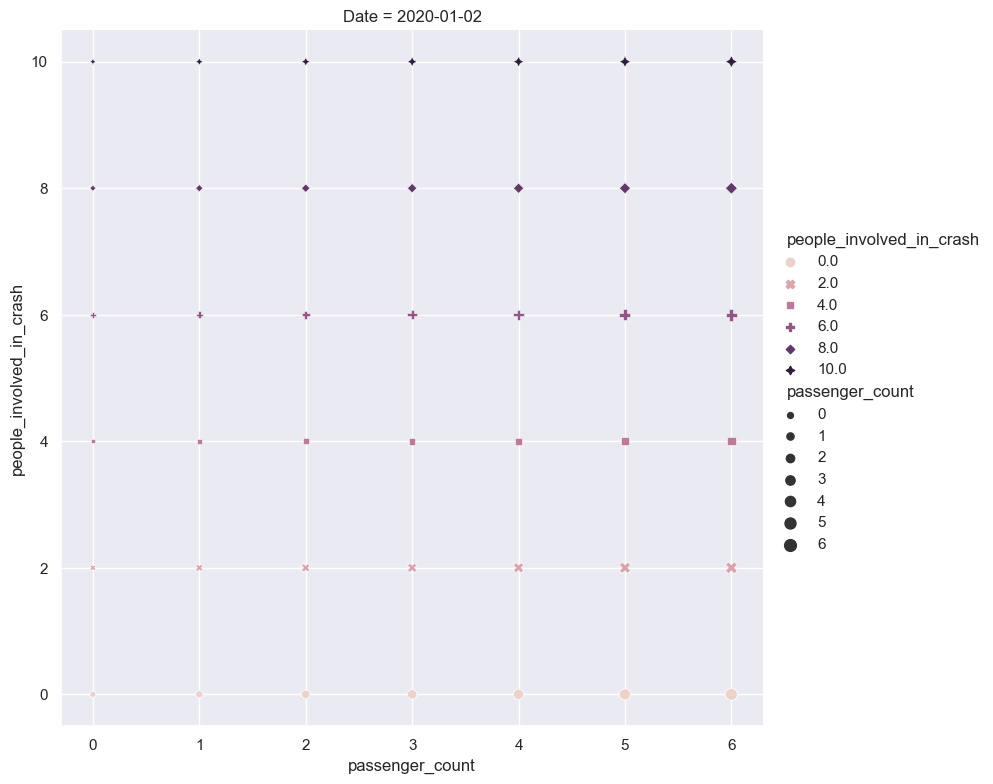

In [80]:
sns.set_theme()

data = pd.read_csv('tc_data_combined.csv', low_memory=False)
sns.relplot(
    data=data,
    x="passenger_count", y="people_involved_in_crash", col="Date",
    hue="people_involved_in_crash", style="people_involved_in_crash", size="passenger_count", height=8,
)

*Answer to research question:* Based on the count alone, out of a sample of 3,302,124 results, a rate of 23.97% of those happened around the same time that taxi cabs were in use. This is indication that increased taxi cab does not directly contribute to more crashes, but that there is a small correlation.
Based on the graph, we can see a similar correlation between the passenger count and crashes.

In [61]:
#Visual 2: Visually inspecting the data to determine correlation. Including congestion surcharge.

<Axes: xlabel='Date'>

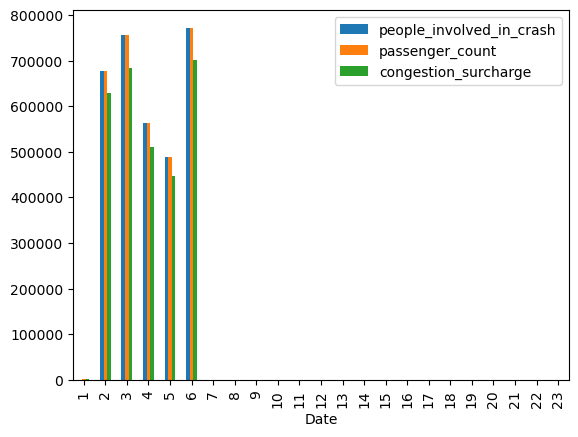

In [62]:
tc_data_combined[['people_involved_in_crash', 'passenger_count', 'congestion_surcharge']].groupby(tc_data_combined["Date"].dt.day).count().plot(kind="bar")

*Answer to research question:* Based on this visual, the amount of taxi cab use corresponds with crashes. However, this doesn't necessarily indicate causation or correlation. The congestion surcharge is more accurate to go off of as it allows us to count when there was general congestion (from the perspective of the taxis) and if that congestion correlates more with those involved in crashes.

### **5.2:** Reflection


*Answer:* I think if I had more time to complete the project, I would find a better dataset or make the taxi cab dataset more malleable. The issue with the dataset was that it considerably too large to use productively. If I could simply use two CSV files, I could take a better sample and work with that.

Additionally, the datasets themselves were not normalized. I would want to explore normalizing the data so that it is easier to use. There was a lot of difficulty with querying and simply the large amount of data due to large amounts of null values.

Lastly, I believe that if we were to get better locations from the individual datasets, we'd be able to make a more thorough analysis of where increased taxi cab use was. Then we'd be able to correspond those locations to the locations within the crash dataset.